## Import Libraries

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

In [169]:
train=pd.read_csv(r"C:\Users\LENOVO\Downloads\used_cars_train_data.csv")
test=pd.read_csv(r"C:\Users\LENOVO\Downloads\used_cars_test_data.csv")

In [170]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [171]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


## Data Dictionary

* name of car
* location 
* year 
* kilometers driven
* fuel type of car
* transmission of car
* owner type of car 
* mileage of car
* engine 
* power 
* seats - no. of seats 
* price of car

## Check null values

In [172]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [173]:
test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [174]:
train["Engine"]=train["Engine"].str.replace("CC"," ")
test["Engine"]=test["Engine"].str.replace("CC"," ")

In [175]:
train["Engine"]=pd.to_numeric(train["Engine"])
test["Engine"]=pd.to_numeric(test["Engine"])

In [176]:
train["Power"].nunique()

372

In [177]:
train['Power'] = train['Power'].str.replace(' bhp','')
test['Power'] = test['Power'].str.replace(' bhp','')

In [178]:
print(train[train['Power']=='null'].shape)
print(test[test['Power']=='null'].shape)

(107, 12)
(22, 11)


In [179]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [180]:
train['Power'] = train['Power'].replace('null',np.nan)
test['Power'] = test['Power'].replace('null',np.nan)

In [181]:
train['Power'] = pd.to_numeric(train['Power'])
test['Power'] = pd.to_numeric(test['Power'])

In [182]:
train['Power'].fillna(train['Power'].median(),inplace=True)
test['Power'].fillna(test['Power'].median(),inplace=True)

In [183]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                 0
Seats                42
Price                 0
dtype: int64

In [184]:
train["Engine"].fillna(train["Engine"].median(), inplace=True)
test["Engine"].fillna(test["Engine"].median(), inplace=True)

In [185]:
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [186]:
train["Brand"]=train["Name"].str.split().str[0]
test["Brand"]=test["Name"].str.split().str[0]
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi


In [187]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998.0,58.20,4.0,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796.0,47.30,5.0,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393.0,147.80,7.0,Toyota
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364.0,93.70,5.0,Toyota
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197.0,82.85,5.0,Hyundai


In [188]:
train["Brand"].nunique()

31

In [189]:
train["Model"]=train["Name"].str.split().str[1]
test["Model"]=test["Name"].str.split().str[1]
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4


In [190]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998.0,58.20,4.0,Maruti,Alto
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796.0,47.30,5.0,Maruti,Alto
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393.0,147.80,7.0,Toyota,Innova
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364.0,93.70,5.0,Toyota,Etios
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197.0,82.85,5.0,Hyundai,i20


In [191]:
train["Model"].nunique()

212

In [192]:
train['Brand']= train['Brand'].replace('Land','LandRover')
train['Brand']= train['Brand'].replace('ISUZU','Isuzu')
train['Brand']= train['Brand'].replace('Mini','MiniCooper')

In [193]:
test['Brand']= test['Brand'].replace('Land','LandRover')
test['Brand']= test['Brand'].replace('ISUZU','Isuzu')
test['Brand']= test['Brand'].replace('Mini','MiniCooper')

In [195]:
train["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'LandRover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'MiniCooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [196]:
test["Brand"].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Hindustan', 'Renault', 'MiniCooper', 'Bentley', 'LandRover',
       'Volvo', 'Isuzu', 'Jeep', 'Porsche', 'OpelCorsa'], dtype=object)

In [197]:
test["Brand"].nunique()

28

In [198]:
print(set(test['Brand'].unique()).difference(train['Brand'].unique()))
print( test[test['Brand'].isin(['Hindustan', 'OpelCorsa'])].shape)

{'OpelCorsa', 'Hindustan'}
(2, 13)


In [199]:
train1 = train.copy()
test1 = test.copy()
print(train.shape)
print(test.shape)

(6019, 14)
(1234, 13)


In [200]:
test = test[~test['Brand'].isin(['Hindustan', 'OpelCorsa'])]
print(test.shape)

(1232, 13)


In [201]:
uncommon_model_in_test=list(set(test["Model"].unique()).difference(train["Model"].unique()))
print(uncommon_model_in_test)

['Abarth', 'Flying', 'MU', '370Z', 'Land']


In [202]:
test[test['Model'].isin(uncommon_models_in_test)].shape

(5, 13)

In [203]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                 0
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [204]:
train["Seats"].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [205]:
train["Seats"].fillna(train["Seats"].mode()[0], inplace=True)
test["Seats"].fillna(test["Seats"].mode()[0], inplace=True)

In [206]:
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [207]:
test[test["Mileage"].str.endswith("km/kg")].shape

(8, 13)

In [208]:
train[train["Fuel_Type"].isin(["CNG","LPG"])].shape

(66, 14)

In [209]:
train['Mileage'] = train['Mileage'].str.replace(' km/kg','')
train['Mileage'] = train['Mileage'].str.replace(' kmpl','')

In [210]:
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Mileage'] = test['Mileage'].str.replace(' kmpl','')

In [211]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968.0,140.80,5.0,17.74,Audi,A4


In [212]:
train['Mileage']=pd.to_numeric(train["Mileage"])
test["Mileage"]=pd.to_numeric(test["Mileage"])

In [213]:
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object

In [214]:
train['Mileage'].fillna(train['Mileage'].median(),inplace=True)
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

## Check Duplicate

In [215]:
train.duplicated().sum()

0

In [218]:
test.duplicated().sum()

0

In [217]:
test.drop_duplicates(inplace=True)

## EDA - Elaboratory Data Analysis

In [219]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


In [220]:
train["Age"]=2023-train["Year"]
test["Age"]=2023-train["Year"]

In [221]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,10


In [222]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,Maruti,Alto,13
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,Maruti,Alto,8
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,Toyota,Innova,12
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,93.70,5.0,Toyota,Etios,11
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,Hyundai,i20,10


In [223]:
train["Year"].nunique()

22

In [224]:
train["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [225]:
cat_cols=train.dtypes[train.dtypes=="object"].index
num_cols=train.dtypes[train.dtypes!="object"].index

In [226]:
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [227]:
num_cols

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Age'],
      dtype='object')

## Countplot

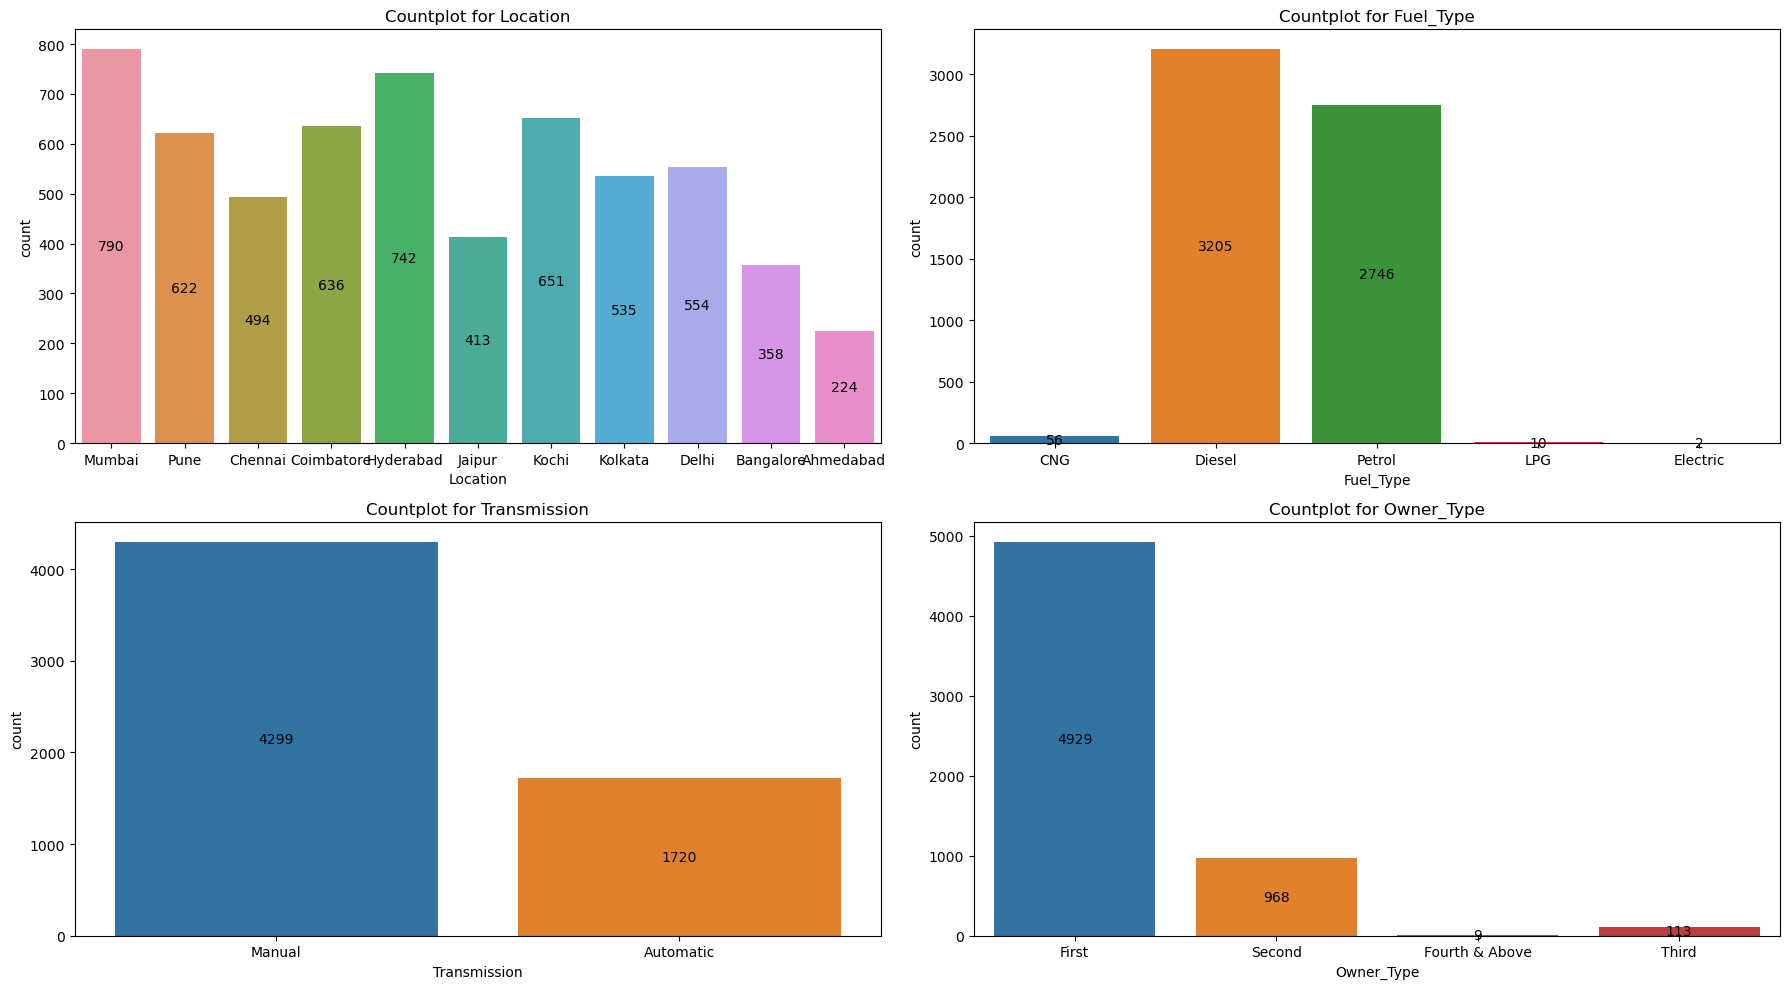

In [230]:
cols = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]

plt.figure(figsize=(18,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax=sns.countplot(x=train[cols[i]])
    ax.bar_label(ax.containers[0], label_type="center")
    plt.title(f'Countplot for {cols[i]}')
plt.tight_layout()
plt.show()

Inference :

* Mumbai and Hyderabad loacated peoples have buying more car.
* The Diesel and Petrol fuel-types are mostly used.
* The buyers prefered manual cars rather than automatic.
* The mostly owner_types are first.

## Boxplot

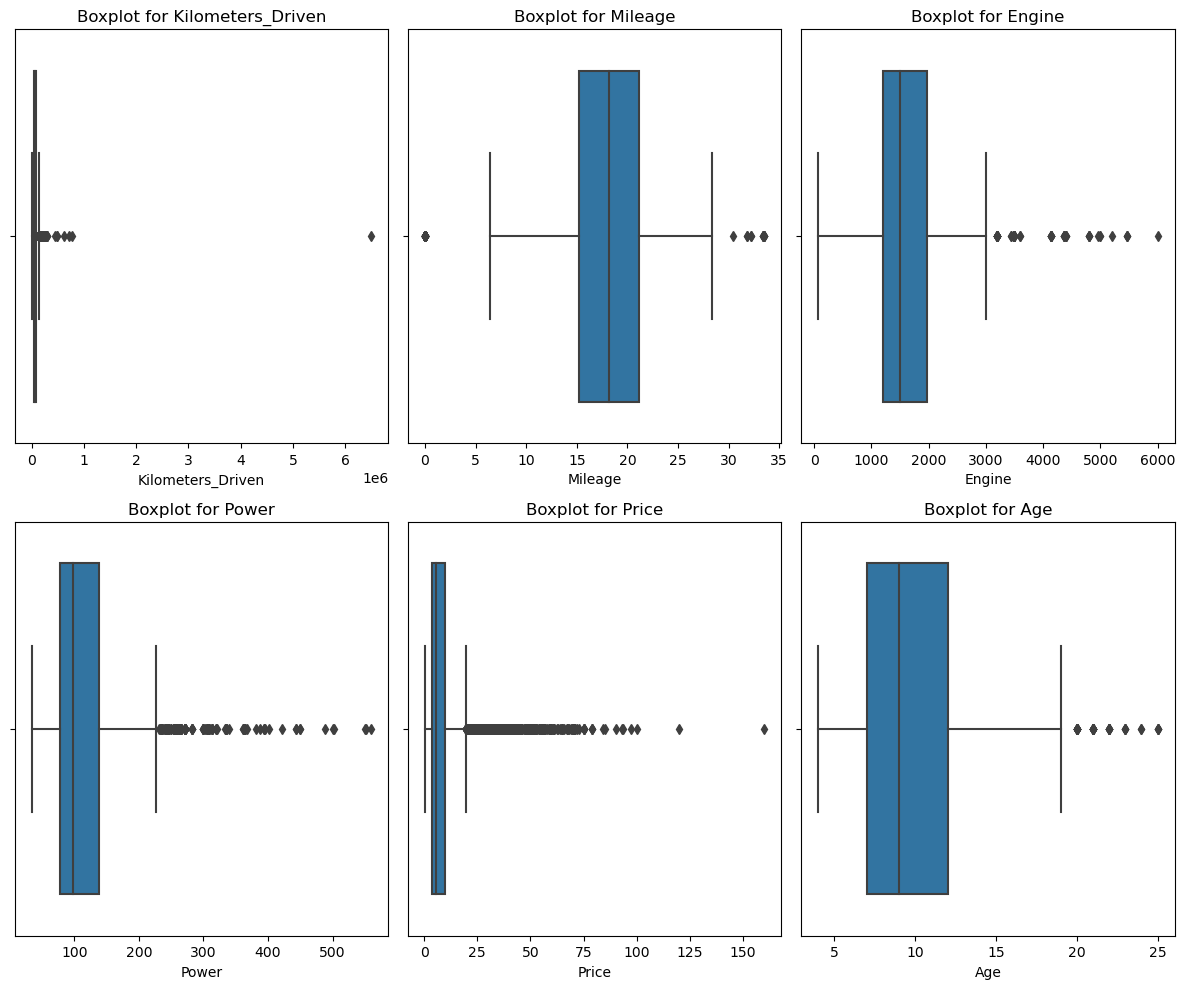

In [235]:
cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Price', 'Age']

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    ax =sns.boxplot(x=train[cols[i]])
#     ax.bar_label(ax.containers[0],label_type='center')
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()    

Inference :

* All are right outliers except Mileage.

## Histogram

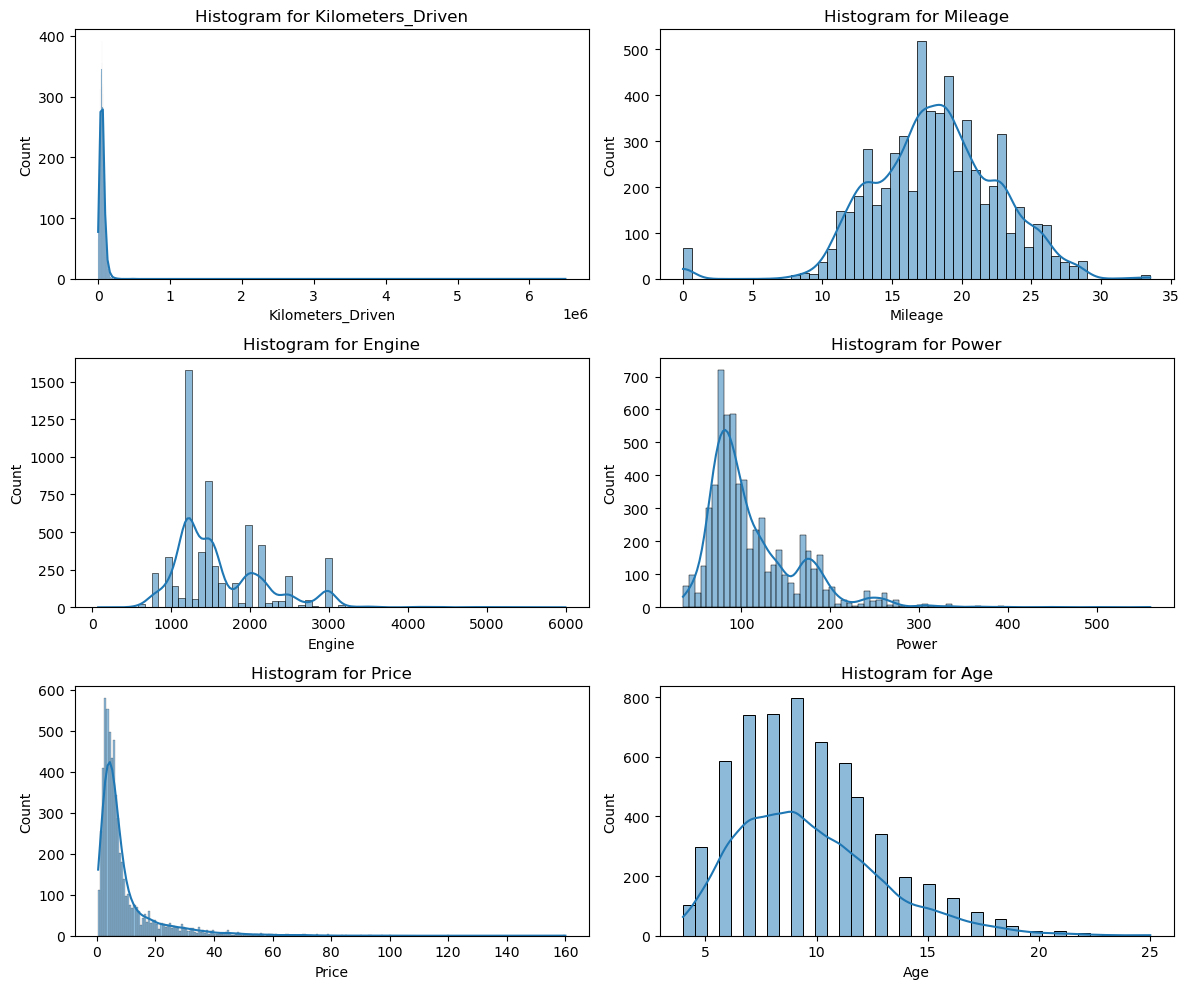

In [255]:
cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Age']
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.histplot(x=train[cols[i]], kde=True)
    plt.title(f"Histogram for {cols[i]}")
plt.tight_layout()
plt.show()

#### EDA - Insights - Analysis

1) Plot Top N Brand wise highest Avg Price<br>
2) Plot Year wise Avg Price in descending order<br>
3) Rank top 3 Brand per Fuel Type with highest mean Price. Also display the corresponding Car_Brand.<br>
4) Rank top N Car_Brand per location based on the Count of Car Brand<br>
5) Find Car_Model wise Avg Price representing only those Car_Models whose avg_price is greater
than avg price of overall average of Car_Model wise Avg Price<br>

##### Q2) Plot Year wise Avg Price in descending order

In [260]:
d2=train.sort_values(["Year", "Price"]).mean()
d2

TypeError: 'DataFrame' object is not callable

##### Q3) Rank top 3 Brand per Fuel Type with highest mean Price. Also display the corresponding Car_Brand.¶

In [261]:
d3=train.groupby(["Fuel_Type", "Brand"])["Price"].mean().reset_index()
d3.head(10)

,Fuel_Type,Brand,Price
0,CNG,Hyundai,3.262500
1,CNG,Maruti,3.551837
2,CNG,Tata,3.250000
3,CNG,Toyota,3.350000
4,Diesel,Ambassador,1.350000
5,Diesel,Audi,25.834608
6,Diesel,BMW,25.597657
7,Diesel,Chevrolet,4.118571
8,Diesel,Fiat,3.770667
9,Diesel,Force,9.333333


In [264]:
d3 = d3.sort_values(['Fuel_Type','Price'],ascending=[True,False])
d3.head()

,Fuel_Type,Brand,Price
1,CNG,Maruti,3.551837
3,CNG,Toyota,3.350000
0,CNG,Hyundai,3.262500
2,CNG,Tata,3.250000
23,Diesel,Porsche,57.440000


In [266]:
d3['Rank'] = d3.groupby(['Fuel_Type']).cumcount() + 1
d3.head(10)

,Fuel_Type,Brand,Price,Rank
1,CNG,Maruti,3.551837,1
3,CNG,Toyota,3.350000,2
0,CNG,Hyundai,3.262500,3
2,CNG,Tata,3.250000,4
23,Diesel,Porsche,57.440000,1
16,Diesel,LandRover,39.232034,2
14,Diesel,Jaguar,34.586944,3
19,Diesel,Mercedes-Benz,28.775941,4
5,Diesel,Audi,25.834608,5
6,Diesel,BMW,25.597657,6


In [267]:
top3_per_fuel_type = d3[d3['Rank']<=3]
top3_per_fuel_type.index = list(range(1,len(top3_per_fuel_type)+1))
top3_per_fuel_type

,Fuel_Type,Brand,Price,Rank
1,CNG,Maruti,3.551837,1
2,CNG,Toyota,3.350000,2
3,CNG,Hyundai,3.262500,3
4,Diesel,Porsche,57.440000,1
5,Diesel,LandRover,39.232034,2
6,Diesel,Jaguar,34.586944,3
7,Electric,Mahindra,13.000000,1
8,Electric,Toyota,12.750000,2
9,LPG,Hyundai,2.630000,1
10,LPG,Maruti,2.344000,2


##### Q4) Rank top N Car_Brand per location based on the Count of Car Brand

In [268]:
n = 2
q4 = train.groupby(['Location','Brand'])['Brand'].count().reset_index(name='Count')
q4 = q4.sort_values(['Location','Count'],ascending=[True,False])
q4.groupby('Location').head(n)

,Location,Brand,Count
8,Ahmedabad,Maruti,50
5,Ahmedabad,Hyundai,48
24,Bangalore,Hyundai,82
29,Bangalore,Mercedes-Benz,34
53,Chennai,Maruti,97
49,Chennai,Hyundai,79
71,Coimbatore,Hyundai,136
77,Coimbatore,Maruti,94
100,Delhi,Maruti,116
95,Delhi,Hyundai,89


##### Q5) Find Car_Model wise Avg Price representing only those Car_Models whose avg_price is greater than avg price of overall average of Car_Model wise Avg Price

## Outlier Treatment

In [271]:
num_cols

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Age'],
      dtype='object')

In [272]:
train[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 
       'Price', 'Age']].describe(percentiles=[0.01,0.02,0.98,0.99]).T

,count,mean,std,min,1%,2%,50%,98%,99%,max
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,4037.44,7272.0,53000.00,150000.0000,172829.00,6500000.00
Mileage,6019.0,18.134966,4.581528,0.00,0.00,10.0,18.15,26.8300,28.09,33.54
Engine,6019.0,1620.509221,599.635458,72.00,796.00,796.0,1493.00,2993.0000,3161.36,5998.00
Power,6019.0,112.883539,53.283701,34.20,40.30,47.3,97.70,258.0000,282.00,560.00
Price,6019.0,9.479468,11.187917,0.44,0.90,1.2,5.64,45.6164,56.00,160.00
Age,6019.0,9.641801,3.269742,4.00,4.00,5.0,9.00,18.0000,19.00,25.00


In [273]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [274]:
cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power','Price', 'Age']

train[cols] = train[cols].apply(outlier_treatment)

In [275]:
train[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 
       'Price', 'Age']].describe(percentiles=[0.01,0.02,0.98,0.99]).T

,count,mean,std,min,1%,2%,50%,98%,99%,max
Kilometers_Driven,6019.0,56951.095837,32431.693099,4037.44,4053.3808,7272.0,53000.00,150000.0000,172688.7800,172829.00
Mileage,6019.0,18.121814,4.546727,0.00,0.0000,10.0,18.15,26.8300,28.0900,28.09
Engine,6019.0,1613.467845,567.432145,796.00,796.0000,796.0,1493.00,2993.0000,3132.1352,3161.36
Power,6019.0,112.144697,49.599517,40.30,40.3000,47.3,97.70,258.0000,282.0000,282.00
Price,6019.0,9.330555,10.293647,0.90,0.9000,1.2,5.64,45.6164,56.0000,56.00
Age,6019.0,9.621698,3.201072,4.00,4.0000,5.0,9.00,18.0000,19.0000,19.00


## Encoding

In [277]:
for i in cat_cols:
    print(f"{i}", train[i].nunique())

Name 1876
Location 11
Fuel_Type 5
Transmission 2
Owner_Type 4
Brand 30
Model 212


In [278]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [279]:
set(test['Brand'].unique()).difference(set(train['Brand'].unique()))

set()

In [280]:
train['Brand'] = lb.fit_transform(train['Brand'])
test['Brand'] = lb.transform(test['Brand'])

In [281]:
train_dum = pd.get_dummies(train,columns=['Location','Fuel_Type',
                                          'Transmission','Owner_Type'],drop_first=True)
print(train_dum.shape)
train_dum.columns

(6019, 29)


Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Brand', 'Model', 'Age', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [282]:
test_dum = pd.get_dummies(test,columns=['Location', 'Fuel_Type',
                                       'Transmission', 'Owner_Type'], drop_first=True)
print(test_dum.shape)
test_dum.columns

(1231, 27)


Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Brand', 'Model', 'Age', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [283]:
x = train_dum.drop(['Price','Name','Year','Model','Fuel_Type_Electric'],axis=1)
y = train_dum['Price']
y1 = train_dum['Price']
print(x.shape)
print(y.shape)
print(y1.shape)

(6019, 24)
(6019,)
(6019,)


In [284]:
x.dtypes.value_counts()

uint8      17
float64     5
int32       1
int64       1
dtype: int64

In [285]:
train.shape

(6019, 15)

In [286]:
from scipy.stats import jarque_bera,shapiro
# Ho : data is normally dist => p>0.05
# H1 : data is not normally dist => p<=0.05

In [287]:
print(jarque_bera(train['Price']))
print(jarque_bera(np.log(train['Price'])))

SignificanceResult(statistic=16912.52255705065, pvalue=0.0)
SignificanceResult(statistic=182.35179351353088, pvalue=2.5281984221940202e-40)


In [288]:
from sklearn.model_selection import train_test_split

In [289]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4213, 24)
(1806, 24)
(4213,)
(1806,)


In [298]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor

In [292]:
from sklearn.metrics import *

In [293]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared=False)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,ypred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res

## Linear Regression

In [294]:
lr1=LinearRegression()

In [295]:
lr1.fit(x_train,y_train)
ypred_lr1=lr1.predict(x_test)

In [296]:
ypred_lr1

array([ 4.72439431, 14.03452132, 11.46534532, ...,  2.29482029,
        9.92695231,  6.42000904])

In [314]:
lr1_df = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'Lin_Reg1')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg1,0.751566,0.736931,29.015032,5.38656,3.583117


## Ridge

In [315]:
rid1=Ridge(alpha=14.5)
rid1.fit(x_train,y_train)
ypred_rid1=rid1.predict(x_test)

In [316]:
rid1_df = model_res(rid1,x_train,x_test,y_train,y_test,ypred_rid1,"Ridge")
rid1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Ridge,0.751388,0.736867,29.022009,5.387208,3.582014


## Decision Tree

In [317]:
dt1 = DecisionTreeRegressor(max_depth=8,min_samples_split=10)
dt1.fit(x_train,y_train)
ypred_dt1 =dt1.predict(x_test)

In [318]:
dt1_df = model_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,"Decision Tree")
dt1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Decision Tree,0.943345,0.85743,15.724681,3.965436,1.985149


## Random Forest

In [319]:
rf1 = RandomForestRegressor(n_estimators=100,max_depth=7,min_samples_split=10,
                            min_samples_leaf=15,random_state=1)
rf1.fit(x_train,y_train)
ypred_rf1  = rf1.predict(x_test)

In [320]:
rf1_df = model_res(rf1,x_train,x_test,y_train,y_test,ypred_rf1,"Random Forest")
rf1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Random Forest,0.90524,0.866306,14.745724,3.840016,1.950801
